In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [57]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [58]:
#data_df.head()

In [59]:
#len(data_df)

In [67]:
#data_df.age_years.unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

Correcting the data type

In [61]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
#data_df.dtypes

In [62]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

In [63]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [64]:
#TO CHECK age_years for <20 and >60
data_df['age_years'].describe()


count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

In [65]:
def populate_bplevels_columns(df):

    #x = 0
    for x in range(len(df)):
        #print(df.ap_hi[x])

        if df.ap_hi[x] < 120 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_normal'] = 1
        elif df.ap_hi[x] < 129 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_elevated'] = 1
        elif df.ap_hi[x] < 139 or df.ap_lo[x] < 89:
            df.loc[x, 'bp_hypertension1'] = 1
        else:
            df.loc[x, 'bp_hypertension2'] = 1
    
    return df

    #print(df.ap_hi[1])


#data_df.drop(columns=['bp_normal','bp_elevated','bp_hypertension1','bp_hypertension2'])        

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


data_df = populate_bplevels_columns(data_df)




In [66]:
#Save copy for analysis
data_df.to_csv('./source/Dataset/analysis_copy.csv', index=False)

In [ ]:
bp_df = data_df[['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']]

show_unique_values(bp_df)

In [ ]:

data_df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)

In [11]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  

#further categoried the age group
bin_age = [19, 29, 39, 49, 59, 69]
category_age = ['20s', '30s', '40s', '50s', '60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

data_df = populates_agebinned_columns(category_age, data_df)
data_df.drop(columns=['age_years','age_binned'], axis=1, inplace=True)


In [12]:
#Drop it first, to change the top codes!!!
data_df.columns
#data_df.drop(columns=['age_binned_<20s','age_binned_>60s'], inplace=True)


Index(['date', 'country', 'id', 'active', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease', 'bmi', 'age_binned_20s', 'age_binned_30s',
       'age_binned_40s', 'age_binned_50s', 'age_binned_60s'],
      dtype='object')

In [13]:
#Further binning Blood Pressure
#data_df.ap_hi.describe()

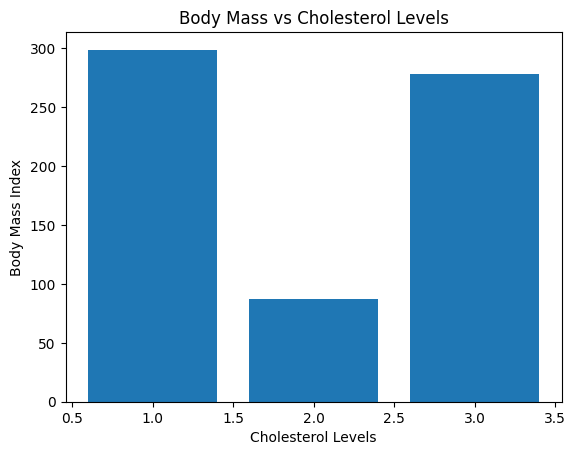

In [17]:
cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

In [18]:
# Create bar chart
#plt.bar(data_df.country, data_df.disease)

# Group by Country and sum occurrences of disease value 1
counts = data_df[data_df['disease'] == 1].groupby('occupation').size()
counts.sort_values(ascending=False)
# Plotting the bar chart
#counts.plot(kind='bar')

# Add labels and title
#plt.xlabel('Occupation')
#plt.ylabel('Disease Count')
#plt.title('Bar Chart Example')

# Adding country names as legends
#plt.legend(labels=counts.index, title='Occupation')

# Show the plot
#plt.show()

occupation
Accountant    4009
Nurse         3937
Architect     3932
Others        3911
Lawyer        3891
Teacher       3868
Chef          3823
Doctor        3808
Engineer      3800
dtype: int64

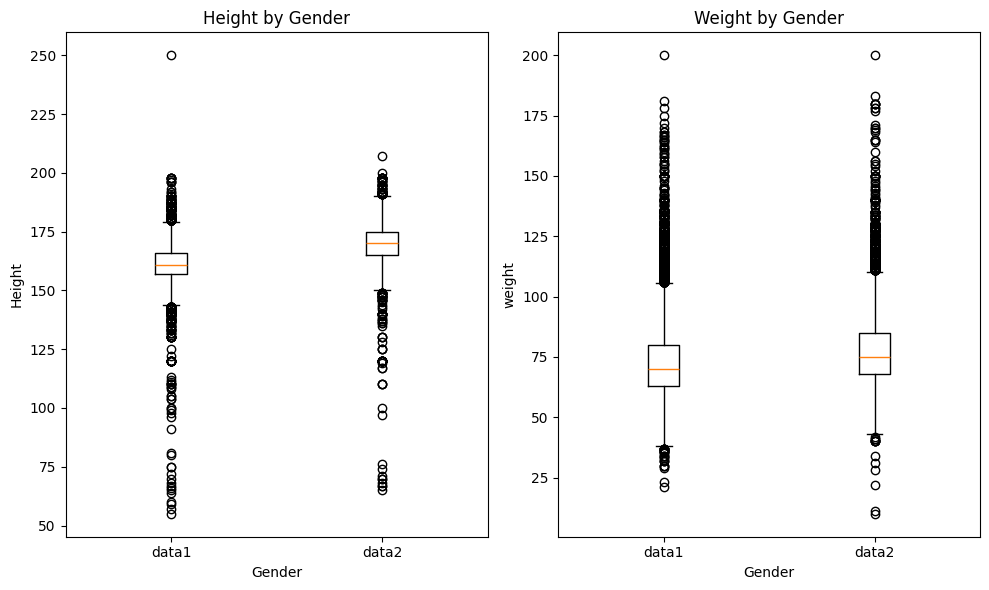

In [19]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [20]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop('gender', axis=1, inplace=True)


In [21]:

def doExcludeOutliers(column_name):

    #Try to workout with the outliers
    q1 = data_df[column_name].quantile(0.25)
    q3 = data_df[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for acceptable values
    threshold_lower = q1 - 1.5 * iqr
    threshold_upper = q3 + 1.5 * iqr

    # Identify outliers in the 'height' column
    outliers = data_df[(data_df[column_name] < threshold_lower) | (data_df[column_name] > threshold_upper)]

    # Exclude outliers from the dataset, but keep those within the threshold range
    filtered_data1 = data_df[(data_df[column_name] >= threshold_lower) & (data_df[column_name] <= threshold_upper)]

    plt.boxplot(filtered_data1[column_name], labels=[f'{column_name}_test'])
    plt.show()

    data_df = filtered_data1


In [22]:
#doExcludeOutliers('weight')
#doExcludeOutliers('height')

In [23]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop('cholesterol', axis=1, inplace=True)



In [24]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop('gluc', axis=1, inplace=True)


In [25]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

#data_df[['country', 'country_num']].drop_duplicates()
data_df.drop('country', axis=1, inplace=True)

In [26]:
#data_df.max()

In [27]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

#data_df[['occupation', 'occupation_num']].drop_duplicates()
data_df.drop(columns=['occupation'], inplace=True)


In [28]:
#data_df['gluc'].unique()

data_df.corr()

#data_df['age_binned_>60s'].unique()

date        id    active      alco    height  \
date                1.000000 -0.001225  0.000678  0.008741  0.000116   
id                 -0.001225  1.000000  0.003755  0.001210 -0.003038   
active              0.000678  0.003755  1.000000  0.025476 -0.006570   
alco                0.008741  0.001210  0.025476  1.000000  0.094419   
height              0.000116 -0.003038 -0.006570  0.094419  1.000000   
smoke               0.004024 -0.003699  0.025858  0.340094  0.187989   
weight             -0.001464 -0.001830 -0.016867  0.067113  0.290968   
disease            -0.002015  0.003799 -0.035653 -0.007330 -0.010821   
bmi                -0.002383 -0.001377 -0.014261  0.014394 -0.290642   
age_binned_20s      0.005717 -0.004939  0.003235 -0.001561  0.004232   
age_binned_30s      0.005299 -0.013859  0.000356  0.014573  0.017384   
age_binned_40s      0.001878 -0.000007  0.010877  0.021253  0.064202   
age_binned_50s     -0.001898  0.004245 -0.002685 -0.005585 -0.020790   
age_binned_60s     -0.001968  0.000245 -0.009296 -0.023209 -0.054459   
bp_normal           0.005292 -0.002946  0.011892 -0.014840 -0.078094   
bp_elevated         0.003163  0.006117 -0.005234  0.001556  0.009904   
bp_hypertension1   -0.002787 -0.002084 -0.013960 -0.013465  0.059189   
bp_hypertension2   -0.002691  0.001871  0.009276  0.027599 -0.010079   
gender_male         0.002018  0.003502  0.005866  0.170966  0.499033   
gender_female      -0.002018 -0.003502 -0.005866 -0.170966 -0.499033   
cholesterol_high   -0.003266  0.005819  0.013081  0.016915 -0.041043   
cholesterol_medium  0.004210  0.001275 -0.004695  0.039402 -0.023180   
cholesterol_low    -0.000926 -0.005290 -0.005911 -0.043610  0.048532   
gluc_high          -0.008688  0.001490 -0.002397 -0.003499 -0.013980   
gluc_medium         0.003230  0.002370 -0.009932  0.031648 -0.012309   
gluc_low            0.004080 -0.002844  0.009061 -0.020606  0.019400   
country_num        -0.003885  0.001960 -0.001662  0.001951 -0.001730   
occupation_num      0.004407  0.000910 -0.001038 -0.000058  0.001760   

                       smoke    weight   disease       bmi  age_binned_20s  \
date                0.004024 -0.001464 -0.002015 -0.002383        0.005717   
id                 -0.003699 -0.001830  0.003799 -0.001377       -0.004939   
active              0.025858 -0.016867 -0.035653 -0.014261        0.003235   
alco                0.340094  0.067113 -0.007330  0.014394       -0.001561   
height              0.187989  0.290968 -0.010821 -0.290642        0.004232   
smoke               1.000000  0.067780 -0.015486 -0.027215       -0.002035   
weight              0.067780  1.000000  0.181660  0.762009       -0.001913   
disease            -0.015486  0.181660  1.000000  0.165632       -0.006543   
bmi                -0.027215  0.762009  0.165632  1.000000       -0.003592   
age_binned_20s     -0.002035 -0.001913 -0.006543 -0.003592        1.000000   
age_binned_30s      0.011535 -0.021568 -0.083096 -0.025490       -0.001058   
age_binned_40s      0.042687 -0.035605 -0.150029 -0.063505       -0.004086   
age_binned_50s     -0.020379  0.021792  0.034013  0.030203       -0.006649   
age_binned_60s     -0.027701  0.021842  0.163080  0.044838       -0.003134   
bp_normal          -0.012995 -0.180748 -0.221611 -0.127804        0.003730   
bp_elevated        -0.000543 -0.048347 -0.076054 -0.045187       -0.001415   
bp_hypertension1   -0.008385 -0.022830 -0.117675 -0.045538        0.000878   
bp_hypertension2    0.021077  0.202182  0.362812  0.183382       -0.003448   
gender_male         0.338135  0.155406  0.008109 -0.096529       -0.000223   
gender_female      -0.338135 -0.155406 -0.008109  0.096529        0.000223   
cholesterol_high   -0.002185  0.114499  0.191798  0.120016       -0.002363   
cholesterol_medium  0.024587  0.067939  0.081442  0.066597       -0.002602   
cholesterol_low    -0.017839 -0.137981 -0.205536 -0.140979        0.003796   
gluc_high          -0.013074  0.068318  0.070241  0.066370     

Text(0.5, 1.0, 'Correlation Heatmap')

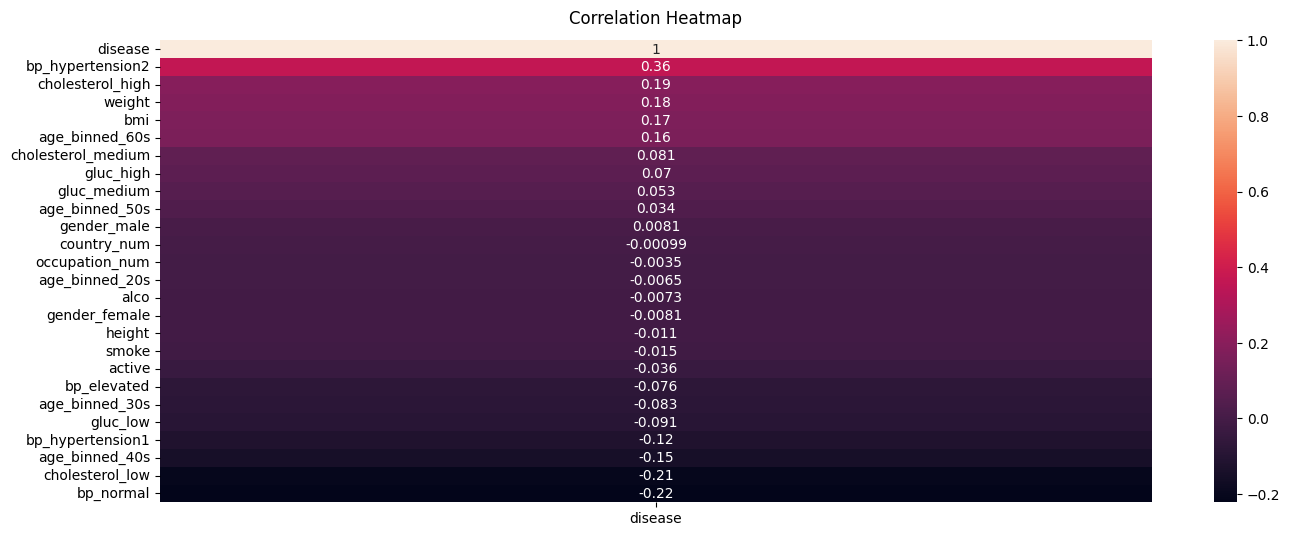

In [29]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
def doLogisticRegression(df, age_group_param):
    
    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    lr = LogisticRegression(solver='liblinear', max_iter=50000)

    lr.fit(X_train, y_train)

    pred = lr.predict(X_test)

    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df = report_df.transpose()
    report_df['age_group'] = age_group_param

    return report_df

    #accuracy = metrics.accuracy_score(pred, y_test)

    #print("The Accuracy of the logistic regression model is: ", accuracy*100, "%")

In [32]:
def doKNNClassifier(df, age_group_param):
    
    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    knn = KNeighborsClassifier(n_neighbors = 3)

    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)

    #acc = metrics.accuracy_score(pred, y_test)

    #print("The accuracy of the KNN model is: ", acc*100, "%")

    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df['age_group'] = age_group_param
    report_df = report_df.transpose()

    return report_df 

In [33]:
# Feature Selection
selected_df = iddate_removed_df
#selected_30_df = iddate_removed_df[iddate_removed_df['age_binned_30s'] == 1]

selected_columns = selected_df.filter(regex=r'^age_')
selected_columns.drop('age_binned_20s', axis=True, inplace=True)

merge_df = pd.DataFrame()

for col in selected_columns.columns:
    #print(col)
    df = selected_df[iddate_removed_df[col] == 1]
    #selected_df = iddate_removed_df.loc[(iddate_removed_df['age_binned_30s']==1) & (iddate_removed_df['disease'] == 1)]

    age_group = col[-3:]
    #result_df = doLogisticRegression(df, age_group)
    #print(result_df)
    merge_df = pd.concat([merge_df, doLogisticRegression(df, age_group)], axis=0)

#result_df
merge_df

/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_1796/2235158544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.drop('age_binned_20s', axis=True, inplace=True)


precision    recall  f1-score       support age_group
0              0.832258  0.955556  0.889655    405.000000       30s
1              0.742857  0.400000  0.520000    130.000000       30s
accuracy       0.820561  0.820561  0.820561      0.820561       30s
macro avg      0.787558  0.677778  0.704828    535.000000       30s
weighted avg   0.810534  0.820561  0.799832    535.000000       30s
0              0.747321  0.916507  0.823312   3653.000000       40s
1              0.783381  0.493512  0.605545   2235.000000       40s
accuracy       0.755944  0.755944  0.755944      0.755944       40s
macro avg      0.765351  0.705010  0.714429   5888.000000       40s
weighted avg   0.761009  0.755944  0.740651   5888.000000       40s
0              0.628434  0.811870  0.708471   5156.000000       50s
1              0.757621  0.550572  0.637712   5507.000000       50s
accuracy       0.676920  0.676920  0.676920      0.676920       50s
macro avg      0.693028  0.681221  0.673091  10663.000000       50s
weighted avg   0.695154  0.676920  0.671927  10663.000000       50s
0              0.556604  0.182663  0.275058   1292.000000       60s
1              0.697508  0.928326  0.796533   2623.000000       60s
accuracy       0.682248  0.682248  0.682248      0.682248       60s
macro avg      0.627056  0.555494  0.535795   3915.000000       60s
weighted avg   0.651008  0.682248  0.624439   3915.000000       60s

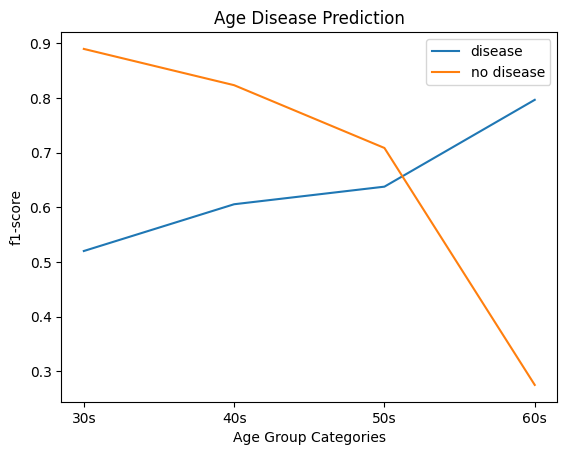

In [34]:
x_axis = merge_df['age_group'].drop_duplicates().values

markers_nodisease = merge_df['f1-score']['0']
markers_withdisease = merge_df['f1-score']['1']

plt.plot(x_axis, markers_withdisease, label='disease')
plt.plot(x_axis, markers_nodisease, label='no disease')

plt.xlabel("Age Group Categories")
plt.ylabel("f1-score")
plt.legend()
plt.title('Age Disease Prediction')
plt.show()


